In [1]:
import scanpy as sc
import scvelo as scv
import pandas as pd
import anndata as ad
import numpy as np
import matplotlib.pyplot as plt

## UMAP

In [2]:
umap_data = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/emb_umap_OR_intersect.csv", index_col=0)
pre_TPM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/pre_TPM_index_pre_spliced.csv", index_col=0)
spliced_TPM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/spliced_TPM_index_pre_spliced.csv", index_col=0)
label_SigRM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/label_SigRM_data.csv", index_col=0)

In [3]:
keep_phases = ["G1", "S", "G2/M"]
label_SigRM = label_SigRM[label_SigRM.iloc[:, 0].isin(keep_phases)]

common_cells = list(set(pre_TPM.columns) & set(spliced_TPM.columns) & set(label_SigRM.index))
pre_TPM = pre_TPM[common_cells]
spliced_TPM = spliced_TPM[common_cells]
label_SigRM = label_SigRM.loc[common_cells]

spliced = spliced_TPM.T
unspliced = pre_TPM.T

In [4]:
adata = ad.AnnData(X=np.log1p(spliced))  # log1p
adata.layers["spliced"] = np.log1p(spliced.values)
adata.layers["unspliced"] = np.log1p(unspliced.values)

adata.obs_names = spliced.index
adata.var_names = spliced.columns

# embedding (UMAP)
adata.obsm["X_umap"] = umap_data.loc[adata.obs_names].values
adata.obs["phase"] = label_SigRM.iloc[:, 0].astype("category")

In [5]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]

sc.tl.pca(adata, n_comps=30)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

# ============ Step 4: velocity ============
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)
scv.tl.velocity_confidence(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)
or disable the progress bar using `show_progress_bar=False`.
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_scvelo_plot_umap_scDART_seq.svg


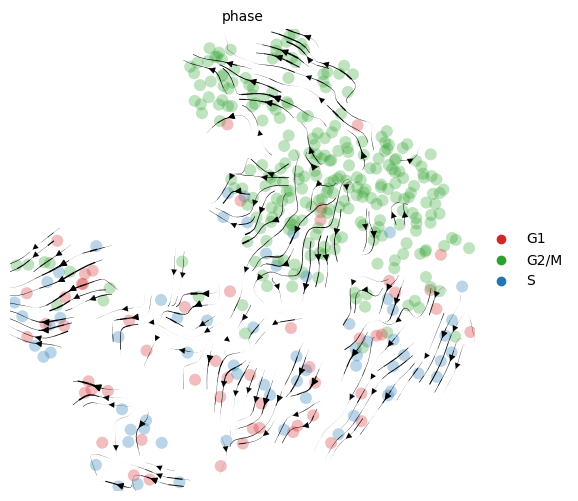

In [6]:
# plot
scv.pl.velocity_embedding_stream(
    adata,
    basis="umap",
    color="phase",
    palette=["#d62728","#2ca02c" , "#1f77b4"],  
    size=300,           
    legend_loc="right",
    figsize=(6, 6),
    save='scvelo_plot_umap_scDART_seq.svg'
)

#plt.savefig('velocity_plot_umap.pdf', format='pdf', bbox_inches='tight')

## tsne

In [7]:
tsne_data = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/emb_tsne_OR_intersect.csv", index_col=0)
pre_TPM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/pre_TPM_index_pre_spliced.csv", index_col=0)
spliced_TPM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/spliced_TPM_index_pre_spliced.csv", index_col=0)
label_SigRM = pd.read_csv("D:/data/VeloRM_data/scDART-seq/origin/label_SigRM_data.csv", index_col=0)

In [8]:
keep_phases = ["G1", "S", "G2/M"]
label_SigRM = label_SigRM[label_SigRM.iloc[:, 0].isin(keep_phases)]

common_cells = list(set(pre_TPM.columns) & set(spliced_TPM.columns) & set(label_SigRM.index))
pre_TPM = pre_TPM[common_cells]
spliced_TPM = spliced_TPM[common_cells]
label_SigRM = label_SigRM.loc[common_cells]

spliced = spliced_TPM.T
unspliced = pre_TPM.T

In [9]:
adata = ad.AnnData(X=np.log1p(spliced))  # log1p
adata.layers["spliced"] = np.log1p(spliced.values)
adata.layers["unspliced"] = np.log1p(unspliced.values)

adata.obs_names = spliced.index
adata.var_names = spliced.columns

# embedding (tsne)
adata.obsm["X_tsne"] = tsne_data.loc[adata.obs_names].values
adata.obs["phase"] = label_SigRM.iloc[:, 0].astype("category")

In [10]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata = adata[:, adata.var["highly_variable"]]

sc.tl.pca(adata, n_comps=30)
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=30)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

# ============ Step 4: velocity ============
scv.tl.velocity(adata, mode="stochastic")
scv.tl.velocity_graph(adata)
scv.tl.velocity_confidence(adata)

computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/24 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_tsne', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_scvelo_plot_tsne_scDART_seq.svg


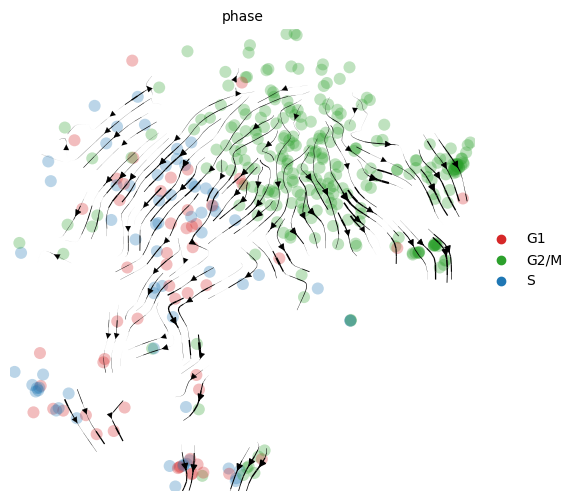

In [11]:
# plot
scv.pl.velocity_embedding_stream(
    adata,
    basis="tsne",
    color="phase",
    palette=["#d62728","#2ca02c" , "#1f77b4"],  
    size=300,            
    legend_loc="right",
    figsize=(6, 6),
    save='scvelo_plot_tsne_scDART_seq.svg'
)
